# Depression Prediction Model

This model was developed as a part of a research implementing Fully Homomorphic Encryption (FHE) into the inference process of a depression prediction model. The goal of this part of the research was to provide:
- **[OUT-FOR]** A clear **data input format** for the user of the prediction model, based on the cleaned dataset
- **[OUT-PRE]** A **data preprocessor** object to preprocess the input data on the FHE implementation
- **[OUT-DAT]** Train-test **data** for evaluating the FHE implementation
- **[OUT-MOD]** Model parameter: **weights** and **bias**

It is to be noted that optimizing the model was NOT the focus of the research.

In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dass42_svr/dataset/data.csv", delimiter="\t")

# Data Exploration

This part was intended to understand dataset. It included deciding which features or samples to keep or drop.

The model was trained using the "Answers to the Depression Anxiety Stress Scales" dataset obtained from [OpenPsychometrics](https://openpsychometrics.org/_rawdata/). The dataset contained the answer to the 42 questions of the DASS-42 questionnaire created by Lovibond and Lovibond (1995). In DASS-42, 14 questions are used to measure depression, 14 to measure anxiety, and the other 14 to measure stress. In addition to that, the dataset includes a TIPI personality test, a demographic survey, as well as several technical data.

From the data exploration, it was decided that:
- All the irrelevant technical data will be dropped from the features.
- All invalid entries (having missing or unrealistic values) will be dropped.
- The label would be engineered by calculating the the value of the 14 depression-related questions, it will be called `depression_score`.
- Since the depression-related questions would have been used to calculate the label, they will not be used to train the data and therefore would be dropped.

In [3]:
dataset.shape

(39775, 172)

In [4]:
pd.set_option('display.max_columns', None)
display(dataset.head())

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,2905,2,18,2998,2,8,10233,1,16,4258,4,28,2888,3,4,59592,2,3,11732,4,2,8834,2,29,7358,1,30,4928,2,15,3036,1,19,4127,2,37,3934,2,26,10782,4,1,8273,3,39,3501,1,27,3824,4,25,2141,3,6,17461,4,24,1557,4,40,4446,4,42,1883,2,35,5790,2,14,4432,1,20,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,4506,1,14,2695,1,25,8128,2,15,3125,1,6,4061,1,40,4272,1,12,4029,1,9,5630,1,18,30631,2,24,9870,4,4,2411,1,16,9478,3,1,7618,3,32,12639,3,34,5378,1,41,8923,2,38,2977,4,3,5620,1,7,16760,1,8,6427,2,39,3760,1,13,4112,3,42,2769,4,33,4432,4,30,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,3093,4,38,7098,4,37,1938,4,15,3502,3,32,4776,3,18,4463,4,4,2436,2,40,4047,4,31,3787,4,42,2102,2,1,12351,4,3,2410,2,22,5056,4,39,3343,3,27,3012,4,20,3520,4,8,1868,4,25,2536,3,24,3725,4,30,2130,3,29,3952,3,21,10694,3,41,3231,4,12,3604,4,28,1950,3,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology


# Pre-Processing

What this part did:
- Drops irrelevant feature
- Drops invalid entries
- Engineers the target/label
- Bins categorical (ordinal + nominal) features
- Encodes ordinal features
- Encodes nominal features using one-hot encoding
- Scales numeric features

At the end, a ready-to-train dataset was produced.

### Dropping Irrelevant Features

In [5]:
# Columns regarding a question's metadata (like Q1E, Q2I, etc.)
col_qmeta = dataset.filter(regex="Q\\d+(E|I)").columns
dataset = dataset.drop(columns=col_qmeta)

# Columns regarding technical information
col_technical = ["uniquenetworklocation", "screensize", "source"]
dataset = dataset.drop(columns=col_technical, errors="ignore")

# Columns regarding hard-to-process demographical information
col_demographic = ["country", "major"]
dataset = dataset.drop(columns=col_demographic, errors="ignore")

### Dropping Invalid Entries

In [6]:
# Rows where fake words are marked as known + Drop the columns
dataset = dataset[
    (dataset["VCL6"] == 0) &
    (dataset["VCL9"] == 0) &
    (dataset["VCL12"] == 0)
]
dataset = dataset.drop(columns=['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5',
                                'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
                                'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16'])

# Rows with unrealistic elapsed time + Drop the columns
dataset = dataset[
    (dataset["introelapse"].between(1, 600)) &       # 1s–10min
    (dataset["testelapse"].between(60, 3600)) &      # 1min–1h
    (dataset["surveyelapse"].between(30, 1800))      # 30s–30min
]
dataset = dataset.drop(columns=["introelapse", "testelapse", "surveyelapse"])

# Rows with unrealistic age or family size
dataset = dataset[dataset["age"].between(10, 100)]
dataset = dataset[dataset["familysize"] <= 13]

# Rows with out of range answer
dataset = dataset[dataset["education"].isin([1, 2, 3, 4])]
dataset = dataset[dataset["urban"].isin([1, 2, 3])]
dataset = dataset[dataset["gender"].isin([1, 2, 3])]
dataset = dataset[dataset["engnat"].isin([1, 2])]
dataset = dataset[dataset["hand"].isin([1, 2, 3])]
dataset = dataset[dataset["religion"].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])]
dataset = dataset[dataset["orientation"].isin([1, 2, 3, 4, 5])]
dataset = dataset[dataset["race"].isin([10, 20, 30, 40, 50, 60, 70])]
dataset = dataset[dataset["voted"].isin([1, 2])]
dataset = dataset[dataset["married"].isin([1, 2, 3])]

# Rows with NA values
dataset = dataset.dropna()

# Reset row index
dataset = dataset.reset_index(drop=True)

### Engineering the Target/Label

In [7]:
# Rescale Q1–Q42 answers from 1–4 → 0–3
q_cols = [f"Q{i}A" for i in range(1, 43)]  # all Q1A ... Q42A
dataset[q_cols] = dataset[q_cols] - 1

# Define depression-related questions
depression_qs = ["Q3A","Q5A","Q10A","Q13A","Q16A","Q17A",
                 "Q21A","Q24A","Q26A","Q31A","Q34A","Q37A","Q38A","Q42A"]

# Compute regression target (sum score) + Drop the columns
dataset["depression_score"] = dataset[depression_qs].sum(axis=1)
dataset = dataset.drop(columns=depression_qs)

### Binning Categorical (Ordinal + Nominal) Features

In [8]:
# Binning age into age groups
age_bins = [0, 12, 17, 24, 44, 64, 120]
age_labels = ["Child", "Teen", "Young Adult", "Adult", "Middle-aged", "Senior"]
dataset["age_group"] = pd.cut(dataset["age"], bins=age_bins, labels=age_labels, right=True)

# Binning race
race_mapping = {
    10: "Asian",
    60: "White",
    20: "Other",   # Arab
    30: "Other",   # Black
    40: "Other",   # Indigenous Australian
    50: "Other",   # Native American
    70: "Other"    # Already "Other"
}
dataset["race_group"] = dataset["race"].map(race_mapping)

# Binning religion
religion_mapping = {
    10: "Muslim",
    4: "Christian",
    5: "Christian",
    6: "Christian",
    7: "Christian",
    1: "Atheist/Agnostic",
    2: "Atheist/Agnostic",
    3: "Other Religion",   # Buddhist
    8: "Other Religion",   # Hindu
    9: "Other Religion",   # Jewish
    11: "Other Religion",  # Sikh
    12: "Other Religion",  # Other
}
dataset["religion_group"] = dataset["religion"].map(religion_mapping)

# Drop the original columns
dataset = dataset.drop(columns=["age", "race", "religion"])

### Encoding Ordinal Features

In [9]:
from sklearn.preprocessing import OrdinalEncoder

# Define ordinal columns
ordinal_cols = ["education", "urban", "age_group"]

# Custom category orders for ordinal variables
categories = [
    [1, 2, 3, 4],  # education: Less than HS < HS < University < Graduate
    [1, 2, 3],     # urban: Rural < Suburban < Urban
    ["Child", "Teen", "Young Adult", "Adult", "Middle-aged", "Senior"]  # Age bins
]

# Initialize encoder
ord_encoder = OrdinalEncoder(categories=categories)

# Apply encoding
dataset[ordinal_cols] = ord_encoder.fit_transform(dataset[ordinal_cols])

### One-Hot Encoding Nominal Features & Scaling Numeric Features

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identify columns
cat_cols = ["gender", "engnat", "hand", "religion_group", "orientation", "race_group", "voted", "married"]
target = ["depression_score"]
num_cols = [c for c in dataset.columns if c not in cat_cols + target]

print("Numeric columns:", num_cols)

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="error"), cat_cols),
    ("num", StandardScaler(), num_cols)
])

Numeric columns: ['Q1A', 'Q2A', 'Q4A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q11A', 'Q12A', 'Q14A', 'Q15A', 'Q18A', 'Q19A', 'Q20A', 'Q22A', 'Q23A', 'Q25A', 'Q27A', 'Q28A', 'Q29A', 'Q30A', 'Q32A', 'Q33A', 'Q35A', 'Q36A', 'Q39A', 'Q40A', 'Q41A', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'education', 'urban', 'familysize', 'age_group']


### **[OUT-FOR]** Input Format based on the Cleaned Dataset

Based on the cleaned dataset, we end up with exactly 50 features (not counting the target, `depression_score`). Note that this is before applying one-hot encoding and scaling using `preprocessor`. These 50 features represent the questions that would be used to create a questionnaire as a data input method for the model.

**The Input Data Format**

\# DASS-42 Questions for Anxiety and Stress (28)
- `Q1A`
- `Q2A`
- `Q4A`
- `Q6A`
- `Q7A`
- `Q8A`
- `Q9A`
- `Q11A`
- `Q12A`
- `Q14A`
- `Q15A`
- `Q18A`
- `Q19A`
- `Q20A`
- `Q22A`
- `Q23A`
- `Q25A`
- `Q27A`
- `Q28A`
- `Q29A`
- `Q30A`
- `Q32A`
- `Q33A`
- `Q35A`
- `Q36A`
- `Q39A`
- `Q40A`
- `Q41A`

\# TIPI Personality Test (10)
- `TIPI1`
- `TIPI2`
- `TIPI3`
- `TIPI4`
- `TIPI5`
- `TIPI6`
- `TIPI7`
- `TIPI8`
- `TIPI9`
- `TIPI10`

\# Demographic Information (12)
- `education`
- `urban`
- `gender`
- `engnat`
- `hand`
- `orientation`
- `voted`
- `married`
- `familysize`
- `age_group`
- `race_group`
- `religion_group`

\# Target
- `depression_score`

In [11]:
print(dataset.columns.tolist())

['Q1A', 'Q2A', 'Q4A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q11A', 'Q12A', 'Q14A', 'Q15A', 'Q18A', 'Q19A', 'Q20A', 'Q22A', 'Q23A', 'Q25A', 'Q27A', 'Q28A', 'Q29A', 'Q30A', 'Q32A', 'Q33A', 'Q35A', 'Q36A', 'Q39A', 'Q40A', 'Q41A', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'education', 'urban', 'gender', 'engnat', 'hand', 'orientation', 'voted', 'married', 'familysize', 'depression_score', 'age_group', 'race_group', 'religion_group']


# Training

What this part did:
- Splits train and test data
- Trains the model



### Train-Test Data Split

The dataset was split into 80% training, 20% testing. Here, the preprocessor was fitted with the training data. The processor would later be extracted into a file to be used for the FHE implementation.

In [12]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=["depression_score"])
y = dataset["depression_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor.fit(X_train)          # learn categories + scaling params ONLY from training data
X_train_pre = preprocessor.transform(X_train)
X_test_pre  = preprocessor.transform(X_test)

In [13]:
print(type(X_train))
print(type(X_train_pre))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


### **[OUT-PRE]** Saving the Data Preprocessor

In [14]:
import joblib

# Save the preprocessor
joblib.dump(preprocessor, "/content/drive/MyDrive/Colab Notebooks/dass42_svr/output/preprocessor.joblib")

### Displaying Train-Test Data

In [15]:
# Get column names after transformation
cat_features = preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols)
all_features = list(cat_features) + num_cols   # One-Hot encoded features + numeric features

# Convert arrays to DataFrames
X_train_df = pd.DataFrame(X_train_pre, columns=all_features, index=X_train.index)
X_test_df  = pd.DataFrame(X_test_pre,  columns=all_features, index=X_test.index)

# y_train/y_test are already Series but can be converted to DataFrame
y_train_df = pd.DataFrame(y_train)
y_test_df  = pd.DataFrame(y_test)

# Display
display("X_train_pre:\n", X_train_df.head())
display("X_test_pre:\n",  X_test_df.head())
display("y_train:\n",     y_train_df.head())
display("y_test:\n",      y_test_df.head())

'X_train_pre:\n'

,gender_1,gender_2,gender_3,engnat_1,engnat_2,hand_1,hand_2,hand_3,religion_group_Atheist/Agnostic,religion_group_Christian,religion_group_Muslim,religion_group_Other Religion,orientation_1,orientation_2,orientation_3,orientation_4,orientation_5,race_group_Asian,race_group_Other,race_group_White,voted_1,voted_2,married_1,married_2,married_3,Q1A,Q2A,Q4A,Q6A,Q7A,Q8A,Q9A,Q11A,Q12A,Q14A,Q15A,Q18A,Q19A,Q20A,Q22A,Q23A,Q25A,Q27A,Q28A,Q29A,Q30A,Q32A,Q33A,Q35A,Q36A,Q39A,Q40A,Q41A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,familysize,age_group
9747,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-1.570302,-1.041248,-0.898435,1.405075,0.101403,-0.434727,-0.617704,1.150660,0.563754,-1.454733,2.267268,0.493873,-0.868724,-1.172766,-0.309916,-0.633865,0.778583,0.378012,-1.115135,0.341560,-1.288197,-1.414880,-0.371439,-1.294316,-0.225218,-0.428481,-0.584023,-0.905085,1.165839,0.994517,-1.559599,1.010400,0.626012,-2.057941,-0.203847,1.386934,-0.364866,-0.429194,-0.668701,0.978536,-0.810612,-1.538112
12554,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.377819,-1.041248,0.071779,-0.507896,-0.879284,0.519161,-0.617704,-1.718892,-1.326916,-0.528864,-0.830203,-0.448870,0.073843,-0.271420,-0.309916,0.564520,0.778583,-0.578945,-0.175874,0.341560,-0.356058,1.551431,-1.333091,0.718995,-1.133451,-0.428481,-0.584023,0.063786,-0.430415,-1.228596,0.697092,-0.106621,0.032141,0.068935,0.437639,-0.670992,0.189897,0.115344,0.523203,0.978536,0.786327,-0.202352
8692,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.377819,-0.137469,2.012206,-0.507896,2.062776,-0.434727,1.257791,1.150660,1.509089,1.322874,1.234778,-0.448870,1.016410,-0.271420,-0.309916,2.961289,1.710094,1.334969,0.763388,0.341560,-1.288197,1.551431,1.551864,1.725651,-0.225218,0.557729,-1.490516,2.001530,0.101670,0.438739,1.261264,1.010400,1.219883,1.132373,1.079124,-0.670992,-0.919629,1.204421,1.715107,-0.314788,0.254014,1.133408
20744,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.351880,0.766310,2.012206,0.448589,1.082089,0.519161,1.257791,0.194142,0.563754,0.397005,0.202288,0.493873,0.073843,0.629926,0.672024,0.564520,1.710094,1.334969,1.702650,0.341560,-0.356058,1.551431,1.551864,1.725651,-0.225218,1.543939,0.322470,2.001530,1.165839,0.438739,0.697092,1.010400,1.219883,0.600654,1.079124,1.386934,-1.474392,1.748959,0.523203,0.978536,0.254014,1.133408
3737,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.596241,-0.137469,0.071779,-0.507896,0.101403,-0.434727,-0.617704,0.194142,-0.381581,-0.528864,1.234778,-0.448870,0.073843,0.629926,-0.309916,0.564520,-0.152927,-0.578945,-0.175874,-0.608366,-0.356058,-0.426110,-0.371439,-1.294316,0.683014,-1.414691,-1.490516,0.063786,0.101670,-0.672818,-0.431254,-0.106621,1.219883,0.068935,1.079124,0.872453,1.299423,-0.973733,-0.668701,0.978536,-0.810612,-0.202352


'X_test_pre:\n'

,gender_1,gender_2,gender_3,engnat_1,engnat_2,hand_1,hand_2,hand_3,religion_group_Atheist/Agnostic,religion_group_Christian,religion_group_Muslim,religion_group_Other Religion,orientation_1,orientation_2,orientation_3,orientation_4,orientation_5,race_group_Asian,race_group_Other,race_group_White,voted_1,voted_2,married_1,married_2,married_3,Q1A,Q2A,Q4A,Q6A,Q7A,Q8A,Q9A,Q11A,Q12A,Q14A,Q15A,Q18A,Q19A,Q20A,Q22A,Q23A,Q25A,Q27A,Q28A,Q29A,Q30A,Q32A,Q33A,Q35A,Q36A,Q39A,Q40A,Q41A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,familysize,age_group
9405,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.570302,-0.137469,1.041993,-1.464381,1.082089,-0.434727,0.320043,-1.718892,0.563754,-0.528864,-0.830203,0.493873,0.073843,-1.172766,-0.309916,-0.633865,-1.084438,-1.535901,0.763388,0.341560,-0.356058,0.56266,-0.371439,-0.287660,-0.225218,-0.428481,0.322470,-0.905085,0.633754,-1.228596,-0.995427,-0.106621,0.626012,0.068935,-0.203847,-0.670992,1.299423,-0.429194,0.523203,0.978536,0.786327,1.133408
22691,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.351880,-1.041248,2.012206,1.405075,2.062776,1.473049,0.320043,1.150660,0.563754,1.322874,1.234778,-1.391613,1.958977,-1.172766,-1.291856,-0.633865,-0.152927,0.378012,1.702650,0.341560,-1.288197,0.56266,-1.333091,0.718995,-0.225218,1.543939,1.228963,1.032658,1.697924,-0.117039,-0.431254,0.451890,-1.155600,-0.994503,-0.845333,1.386934,-0.919629,0.659882,-0.668701,-1.608112,0.254014,-1.538112
19770,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.351880,0.766310,1.041993,1.405075,-0.879284,0.519161,-0.617704,0.194142,0.563754,0.397005,-0.830203,0.493873,0.073843,0.629926,-0.309916,0.564520,-0.152927,1.334969,-0.175874,0.341560,0.576081,0.56266,0.590212,-1.294316,-0.225218,0.557729,0.322470,-0.905085,-1.494585,0.994517,0.132919,1.010400,-1.155600,0.600654,-1.486819,-0.670992,-0.919629,0.659882,0.523203,0.978536,0.786327,1.133408
22269,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.377819,-0.137469,-0.898435,-0.507896,-0.879284,-1.388615,-1.555452,1.150660,-0.381581,0.397005,-0.830203,0.493873,-0.868724,-1.172766,-0.309916,-0.633865,-1.084438,0.378012,-1.115135,0.341560,-0.356058,0.56266,-1.333091,-0.287660,-1.133451,0.557729,-1.490516,-0.905085,1.697924,0.438739,0.697092,-0.106621,0.032141,-1.526222,0.437639,0.357971,-0.364866,0.659882,0.523203,0.978536,-0.810612,1.133408
24884,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.596241,-1.041248,-0.898435,-0.507896,-0.879284,-1.388615,-0.617704,0.194142,-0.381581,-0.528864,-0.830203,-0.448870,-0.868724,-1.172766,-0.309916,-0.633865,-1.084438,0.378012,-0.175874,-0.608366,-0.356058,-0.42611,-0.371439,-0.287660,-0.225218,0.557729,1.228963,-0.905085,1.165839,-0.117039,-0.995427,0.451890,0.032141,-2.057941,0.437639,0.872453,0.744660,-0.973733,-0.668701,0.978536,-0.810612,-0.202352


'y_train:\n'

,depression_score
9747,7
12554,8
8692,24
20744,39
3737,25


'y_test:\n'

,depression_score
9405,11
22691,13
19770,33
22269,8
24884,8


### **[OUT-DAT]** Saving the Train-Test Data

As the implementation did not focus on comparing the inference result with the actual target value (only the difference between plaintext vs encrypted inference), the target/label value was not saved to a file. A "singular" data was created by taking the first row of the test data. The purpose of this data is for testing & debugging during the development process.

In [ ]:
import os

output_folder = "/content/drive/MyDrive/Colab Notebooks/dass42_svr/output/"
os.makedirs(output_folder, exist_ok=True)

X_train_df.to_csv(output_folder + 'dass42_train.csv', index=False)
X_test_df.to_csv(output_folder + 'dass42_test.csv', index=False)
X_test_df.head(1).to_csv(output_folder + "dass42_test_singular.csv", index=False)

### Training the Model

The linear SVR model was trained using scikit-learn's `LinearSVR()`

In [17]:
from sklearn.svm import LinearSVR

model = LinearSVR(random_state=42)
model.fit(X_train_pre, y_train)

LinearSVR(random_state=42)

### **[OUT-MOD]** Extracting the Model Parameters

Extracting the SVR model's weights and bias.

In [ ]:
import os
import numpy as np

output_folder = "/content/drive/MyDrive/Colab Notebooks/dass42_svr/output/"
os.makedirs(output_folder, exist_ok=True)

np.savetxt(output_folder + "weights.txt", model.coef_)
np.savetxt(output_folder + "bias.txt", model.intercept_)

# Evaluation

This part calculated some metrics to evaluate the performance of the model.

No optimization was performed after evaluating the model.

### Calculating MAE, RMSE, and R^2

- **MAE (Mean Absolute Error)**: The average of the absolute differences between predicted values and actual values.
- **RMSE (Root Mean Squared Error)**: The square root of the average of squared prediction errors.
- **R^2 (Coefficient of Determination)**: Measures how much variance in the target variable is explained by the model.

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict
y_pred = model.predict(X_test_pre)

# Evaluate
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   # easier to interpret (same units as target)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"MAE : {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R^2 : {r2:.3f}")

MAE : 5.547
RMSE: 7.300
R^2 : 0.647


### Visualization of Actual vs Predicted Sample

In [20]:
df_cmp = pd.DataFrame({"y_true": y_test.values, "y_pred": y_pred})
print(df_cmp.sample(8))

      y_true     y_pred
3771      10  11.343268
3543      18  20.240601
751       28  36.163420
2766      34  24.505504
5468      17  23.350421
2913      33  25.450695
1313      33  27.495549
1079      32  25.365947


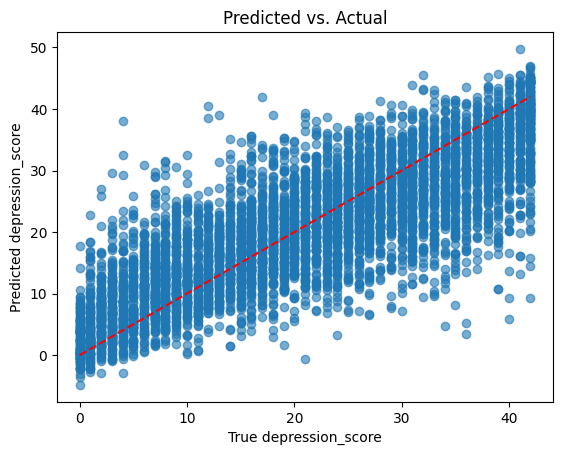

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("True depression_score")
plt.ylabel("Predicted depression_score")
plt.title("Predicted vs. Actual")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.show()

# Conclusion

This part of the research successfully developed a depression prediction model sufficient to provide the necessary components for implementing an FHE-based inference system.

**Outputs:**

- **Data Input Format:** A well-defined input format was established, specifying the 50 features (DASS-42 anxiety/stress questions, TIPI personality test, and demographic information) required to form a user questionnaire.
- **Data Preprocessor:** A `ColumnTransformer` preprocessor, including `OneHotEncoder` for nominal features and `StandardScaler` for numeric features, was trained and saved. This object is crucial for preparing user input for the FHE implementation.
- **Train-Test Data:** Cleaned and preprocessed train and test datasets (`dass42_train.csv`, `dass42_test.csv`, and a singular test sample `dass42_test_singular.csv`) were generated and saved, providing the data needed for FHE testing.
- **Model Parameters:** The weights and bias from the `LinearSVR` model were extracted and saved, serving as the core model parameters for the FHE inference.

**Model Performance:**

The trained `LinearSVR` model achieved an MAE of `5.547`, RMSE of `7.300`, and an R² of `0.647` on the test set. While these metrics provide an understanding of the model's predictive capability, it's important to reiterate that performance optimization was secondary to generating the required FHE-compatible artifacts.